In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import numpy
from PIL import Image
import PIL
import matplotlib

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

In [2]:
#MNIST на свёрточных сетях
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
count_lines = len(training_data_list)
for i in range(0,len(training_data_list)):
    training_data_list[i]=list(map(int, training_data_list[i].split(',')))
training_data_list=np.array(training_data_list)
y_train = training_data_list[:,0]
x_train = training_data_list[:,1:].reshape((count_lines,28,28))
x_train = x_train/ 255.0 + 0.01

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/5
100/100 [==============================]100/100 [==============================] - 0s 4ms/step - loss: 2.1855 - acc: 0.2100

Epoch 2/5
100/100 [==============================]100/100 [==============================] - 0s 1ms/step - loss: 1.2986 - acc: 0.7700

Epoch 3/5
100/100 [==============================]100/100 [==============================] - 0s 1ms/step - loss: 0.8791 - acc: 0.8600

Epoch 4/5
100/100 [==============================]100/100 [==============================] - 0s 1ms/step - loss: 0.5840 - acc: 0.9300

Epoch 5/5
100/100 [==============================]100/100 [==============================] - 0s 2ms/step - loss: 0.3976 - acc: 0.9500



In [3]:
#Тестирование нейросети
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
scor = 0
for record in test_data_list:
    all_values = record.split(',')
    array = numpy.asfarray(all_values[1:])
    inputs = (array / 255.0) * 0.99 + 0.01
    inputs = inputs.reshape((1,28,28))
    
    correct = int(all_values[0])
    outputs = model.predict(inputs)
    label = numpy.argmax(outputs)
    if(label == correct):
        scor+=1
print(scor*100/len(test_data_list),"%")

63.07 %


3 ( 60.02650856971741 % )


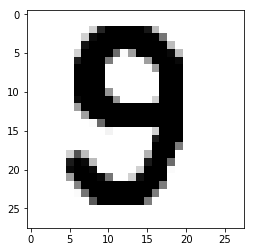

In [4]:
#Тестирование на входном изображении
img = Image.open('my_tests/1.png')
img = img.resize((28, 28), PIL.Image.ANTIALIAS)
img = img.convert('L')

img_data = 255.0-numpy.ravel(numpy.array(img))

matplotlib.pyplot.imshow(255.0-numpy.array(img), cmap="Greys", interpolation="None")


img_data = (img_data / 255.0 * 0.99) + 0.01
img_data = img_data.reshape((1,28,28))
outputs = model.predict(img_data)
label = numpy.argmax(outputs)
print(label, "(", outputs[0][label]*100, "% )")

img.close()